In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
pc1 = np.loadtxt('pc1_obs_iso_new2.txt')
pc2 = np.loadtxt('pc2_obs_iso_new2.txt')
phase = np.loadtxt('phase_obs_iso_new2.txt')

std1=np.std(pc1)
std2=np.std(pc2)
avg1=np.mean(pc1)
avg2=np.mean(pc2)

#pc1=(pc1-avg1)/std1
#pc2=(pc2-avg2)/std2
print(avg1)
print(avg2)
print(std1)
print(std2)

print(pc1.shape)
print(pc2.shape)
print(phase.shape)

-0.0007754984883687232
-0.0003406618866753187
0.9682332168692224
0.95991040399568
(15871,)
(15871,)
(15871,)


In [3]:
#rand=(np.random.rand(10)-0.5)*2.0*0.001
#print(rand)
#print(101//2)

dates=np.arange('1979-04-11', '2022-09-23', dtype='datetime64[D]')
#print(dates.shape)
#print(dates)

dates_mon=np.array(dates,dtype='datetime64[M]')
print(dates_mon[0:10])
print(dates_mon.dtype)

dates_yr=np.array(dates,dtype='datetime64[Y]')
#print(dates_yr)


import pandas as pd 
  
  
dti = pd.date_range('1979-04-11', periods = 15871, freq ='D') 
print(dti.month[0:10]) 
print(dti.month.shape)
print(dti)

dti_mon=dti.month
print(dti_mon.shape)

['1979-04' '1979-04' '1979-04' '1979-04' '1979-04' '1979-04' '1979-04'
 '1979-04' '1979-04' '1979-04']
datetime64[M]
Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype='int32')
(15871,)
DatetimeIndex(['1979-04-11', '1979-04-12', '1979-04-13', '1979-04-14',
               '1979-04-15', '1979-04-16', '1979-04-17', '1979-04-18',
               '1979-04-19', '1979-04-20',
               ...
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
               '2022-09-21', '2022-09-22'],
              dtype='datetime64[ns]', length=15871, freq='D')
(15871,)


In [4]:
stackmax=200
H1=np.zeros((stackmax,pc1.shape[0]-stackmax+1))
H2=np.zeros((stackmax,pc2.shape[0]-stackmax+1))

H1_tmp=np.zeros((stackmax,pc1.shape[0]-stackmax+1))
H2_tmp=np.zeros((stackmax,pc2.shape[0]-stackmax+1))
print(H1.shape)

H_dates=np.zeros((stackmax,pc1.shape[0]-stackmax+1))

H_phase=np.zeros((stackmax,pc1.shape[0]-stackmax+1))


H_dates_yrmon=np.zeros((stackmax,pc1.shape[0]-stackmax+1),dtype='datetime64[M]')


(200, 15672)


In [5]:
for k in range(stackmax):
    H1_tmp[k,:] = pc1[k:len(pc1)-(stackmax-1-k)]
    H2_tmp[k,:] = pc2[k:len(pc2)-(stackmax-1-k)]
    
    H_dates[k,:] = dti_mon[k:len(pc2)-(stackmax-1-k)]
    H_dates_yrmon[k,:] = dates_mon[k:len(pc2)-(stackmax-1-k)]
    
    H_phase[k,:] = phase[k:len(phase)-(stackmax-1-k)]

    
m = H1_tmp.shape[0]
H1 = H1_tmp #-  H1_tmp[m//2,:]
H2 = H2_tmp #-  H2_tmp[m//2,:]

In [6]:
print(H_dates[-1,12000:12010])
print(H_dates_yrmon[-1,12000:12010])

[9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
['2012-09' '2012-09' '2012-09' '2012-09' '2012-09' '2012-09' '2012-09'
 '2012-09' '2012-09' '2012-09']


In [7]:
H = np.vstack((H1,H2))
H_2 = np.vstack((H1_tmp,H2_tmp))
print(H.shape)
print(H_2[0:10,0])
print(H[0:10,0])

(400, 15672)
[ 0.361072   0.0212066 -0.3211246 -0.6511584 -0.9545222 -1.217864
 -1.429457  -1.579753  -1.661821  -1.671695 ]
[ 0.361072   0.0212066 -0.3211246 -0.6511584 -0.9545222 -1.217864
 -1.429457  -1.579753  -1.661821  -1.671695 ]


In [8]:
U, S, VT = np.linalg.svd(H,full_matrices=0)
V=VT.T
print(V.shape)
#print(S)

(15672, 400)


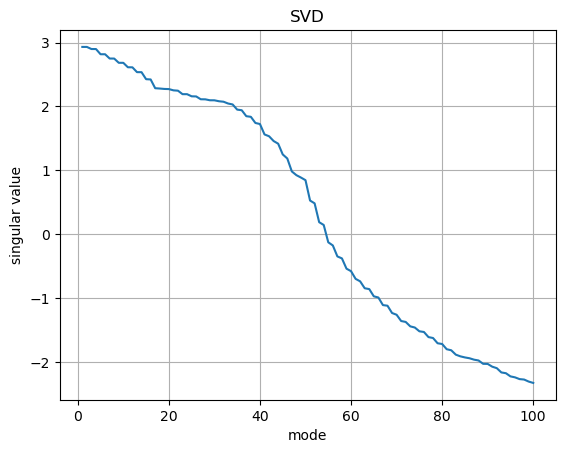

In [9]:
k=np.linspace(1, 100, 100)
var=S**2/sum(S**2)*100
fig, ax = plt.subplots()
ax.plot(k[0:100], np.log10(S[0:100]))

ax.set(xlabel='mode', ylabel='singular value',
       title='SVD')
ax.grid()
plt.savefig("MJO_SVD.pdf") 


In [10]:
print(sum(var[0:80]))

99.99999996327448


# Building the model

In [291]:
r  = 191 #69 for bcor
r2 = 1
dt = 1
dV = (1/(12*dt))*(-V[4:,0:r] + 8*V[3:-1,0:r] - 8*V[1:-3,0:r] + V[:-4,0:r])
#dV = (1/(12*dt))*(-V[4:,:] + 8*V[3:-1,:] - 8*V[1:-3,:] + V[:-4,:])
V2  = V[2:-2,0:r]
#V2  = V[2:-2,:]
print(dV.shape)
print(V2.shape)
print(len(V))

(15668, 191)
(15668, 191)
15672


In [292]:
Xi = np.linalg.lstsq(V2[0:10000,:],dV[0:10000,:],rcond=None)[0]
A2  = Xi[:(r-r2),:(r-r2)].T
#B2  = Xi[-r2:,:(r-r2)].T
B2  = Xi[r-r2:r,:r-r2].T
#B2=np.reshape(B2,(16,1))
print(A2.shape)
print(B2.shape)

(190, 190)
(190, 1)


# Validation

In [293]:
from scipy.signal import lsim
from scipy.signal import lti

n_delays = stackmax-1
t=np.arange(0,len(pc1))

nlag=100
N=1000
L=25

ypred_n=np.zeros((nlag,2,N))
yreal_n=np.zeros((nlag,2,N))
ysig_n=np.zeros((nlag+2*L,2,N))


Ur = U[:, : r]
sr = S[: r]
VrT = VT[: r, :]
Vr = VrT.T

ur = Ur[:, :-r2] @ np.diag(sr[:-r2])


In [294]:
for i in range(0,N):
    t0_2=10000+i*2
    t0=n_delays*1+t0_2
    y0 = (
        # np.linalg.inv(np.diag(self.svals[: self.svd_rank - 1]))
        # @
        np.linalg.pinv(ur)
        @ H[:,t0_2].T
     )

    

    sys = lti(
        #Xi[:(r-r2),:(r-r2)].T,
        #Xi[-r2:,:(r-r2)].reshape(r-r2, r2),
        A2,
        B2,
        ur,
        np.zeros((stackmax*2, r2)),
        )


    tout2, ypred2, xpred2 = lsim(sys, U=Vr[t0_2:,-r2:]*0, T=t[t0:t0+nlag]-t[t0], X0=y0)
    
    ypred_n[:,0,i]=ypred2[:,stackmax-1]
    ypred_n[:,1,i]=ypred2[:,-1]
    
    yreal_n[:,0,i]=H[stackmax-1,t0_2:t0_2+nlag]
    yreal_n[:,1,i]=H[-1,t0_2:t0_2+nlag]
    
    ysig_n[:,0,i]=H_2[stackmax-1,t0_2-L:t0_2+nlag+L]
    ysig_n[:,1,i]=H_2[-1,t0_2-L:t0_2+nlag+L]

In [295]:
corr=np.zeros((nlag))

In [296]:
for tau in range(0,nlag):
    AO=np.dot(yreal_n[tau,0,:],yreal_n[tau,0,:])+np.dot(yreal_n[tau,1,:],yreal_n[tau,1,:])
    AM=np.dot(ypred_n[tau,0,:],ypred_n[tau,0,:])+np.dot(ypred_n[tau,1,:],ypred_n[tau,1,:])
    COM=np.dot(yreal_n[tau,0,:],ypred_n[tau,0,:])+np.dot(yreal_n[tau,1,:],ypred_n[tau,1,:])
    corr[tau]=COM/np.sqrt((AO*AM))

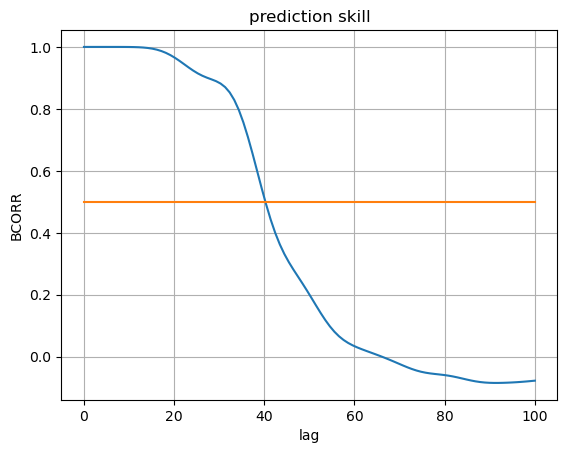

In [297]:
k=np.linspace(0, nlag, nlag)
fig, ax = plt.subplots()
ax.plot(k, corr, k, k*0+0.5)

ax.set(xlabel='lag', ylabel='BCORR',
       title='prediction skill')
ax.grid()

In [298]:
ps=np.where(corr<0.5)
print(ps[0][0])

40


# Figure 

[ 40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140. 150. 160. 170.
 180. 190.]


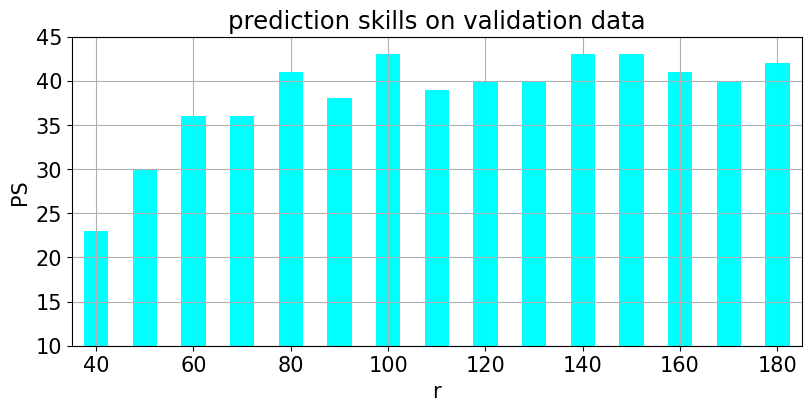

In [308]:
fig, ax = plt.subplots(1,1,figsize=(8,4),layout='constrained')

ps_val=[23, 30, 36, 36, 41, 38, 43, 39, 40, 40, 43, 43, 41, 40, 42, 40]

tt=np.linspace(40, 190, 16)
print(tt)

ax.bar(tt, ps_val,width=5.0,color='cyan')
ax.set_title('prediction skills on validation data', loc='center',fontsize=17.5) 
ax.set_xlabel('r', fontsize=15)
ax.set_ylabel('PS',fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlim([35, 185])
ax.set_ylim([10, 45])
ax.grid()



plt.savefig("koopman_validation.pdf") 
